In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:

df.isna().sum()


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

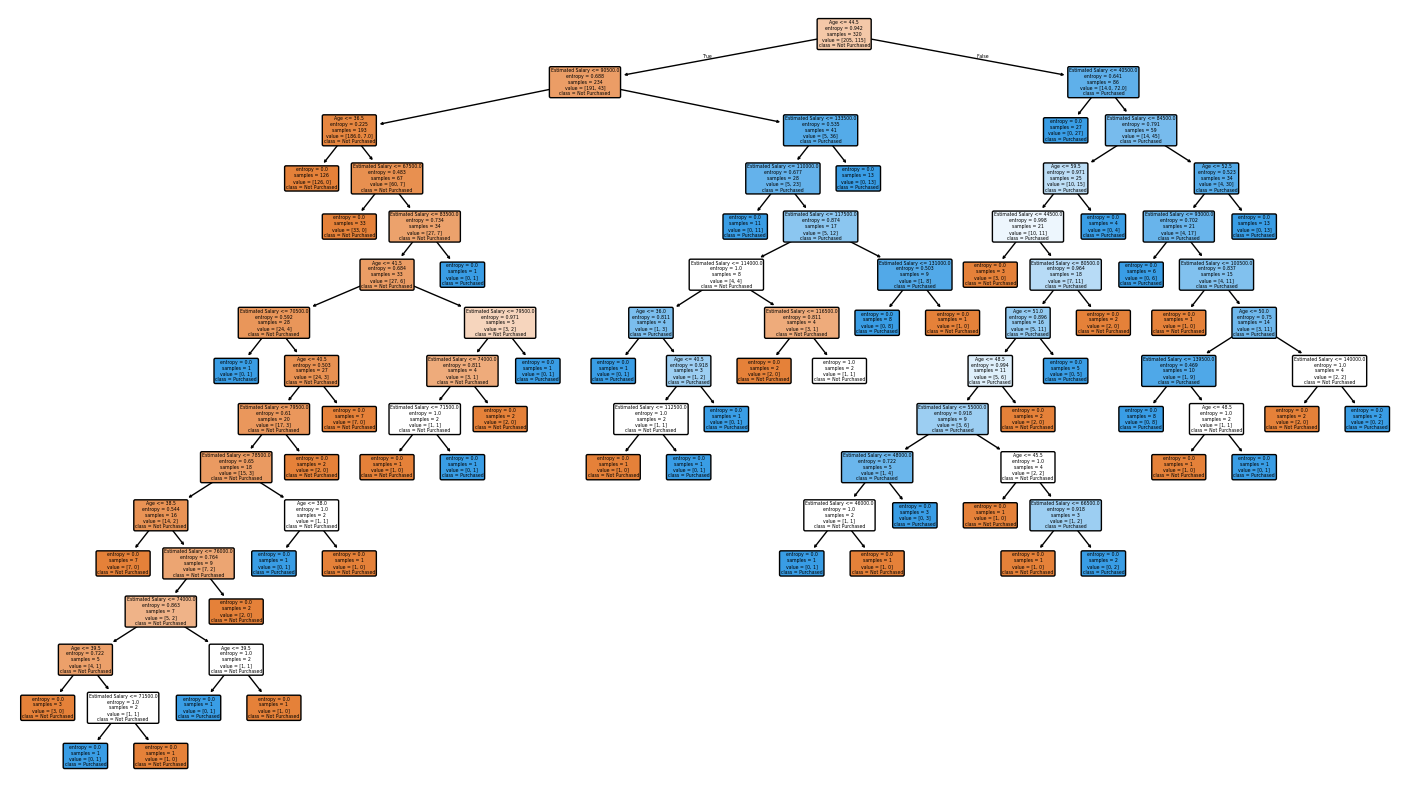

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=["Age", "Estimated Salary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()


In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9125

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[47,  5],
       [ 2, 26]])

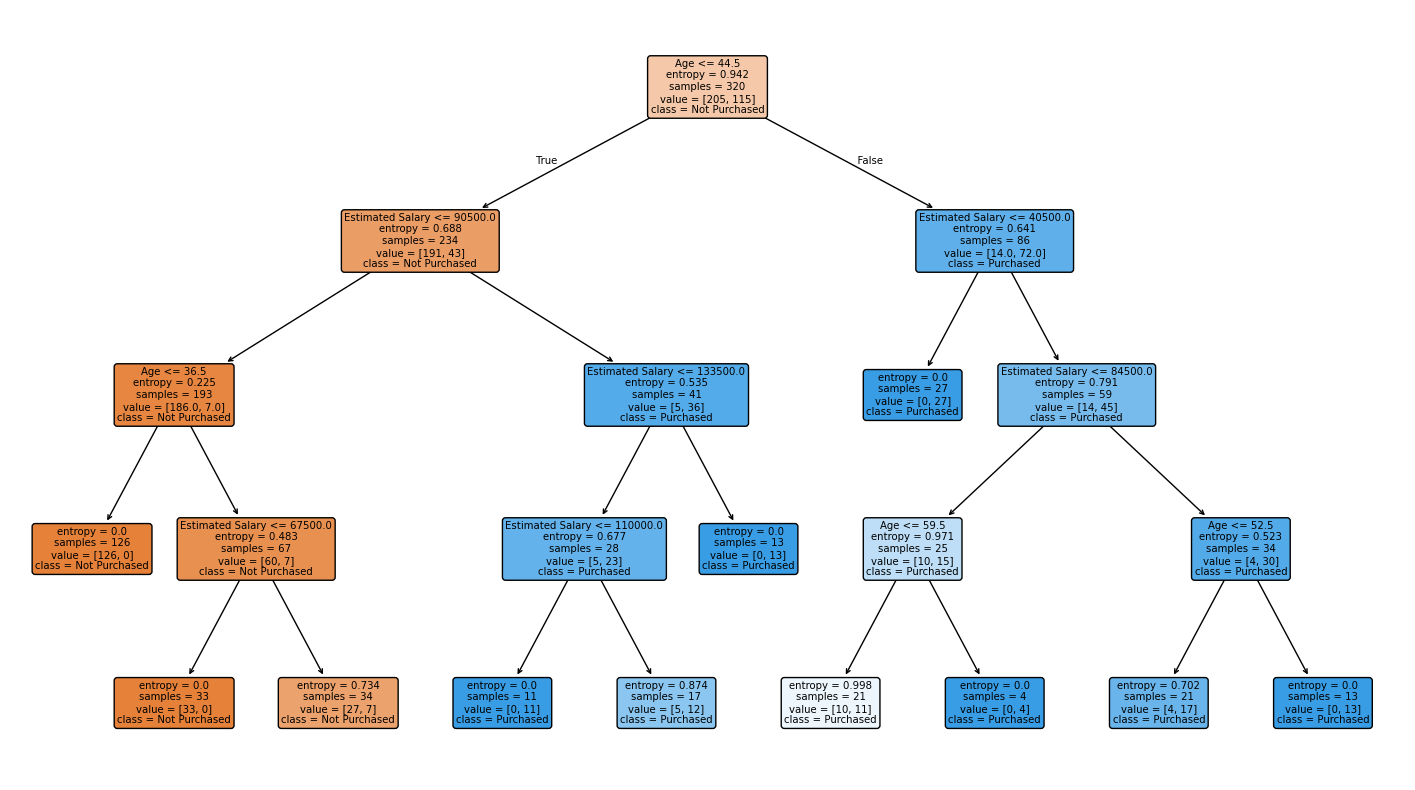

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=["Age", "Estimated Salary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()


**Decision Tree Classifier -Titanic Dataset**


*   Using Titanic passenger data,our goal is to  predict



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree


In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.shape

(891, 15)

In [ ]:
df=df[['survived','pclass','sex','age','fare','embarked']]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [ ]:
df["age"].fillna(df["age"].median(),inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

/tmp/ipython-input-1366853010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['embarked']=encoder.fit_transform(df['embarked'])
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [ ]:
x=df.drop("survived",axis=1)
y=df["survived"]
x.head(),y.head()

(   pclass  sex   age     fare  embarked
 0       3    1  22.0   7.2500         2
 1       1    0  38.0  71.2833         0
 2       3    0  26.0   7.9250         2
 3       1    0  35.0  53.1000         2
 4       3    1  35.0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [ ]:
model=DecisionTreeClassifier(
  criterion="gini",
  max_depth=4,
  random_state=42
)
model.fit(x,y)

DecisionTreeClassifier(max_depth=4, random_state=42)

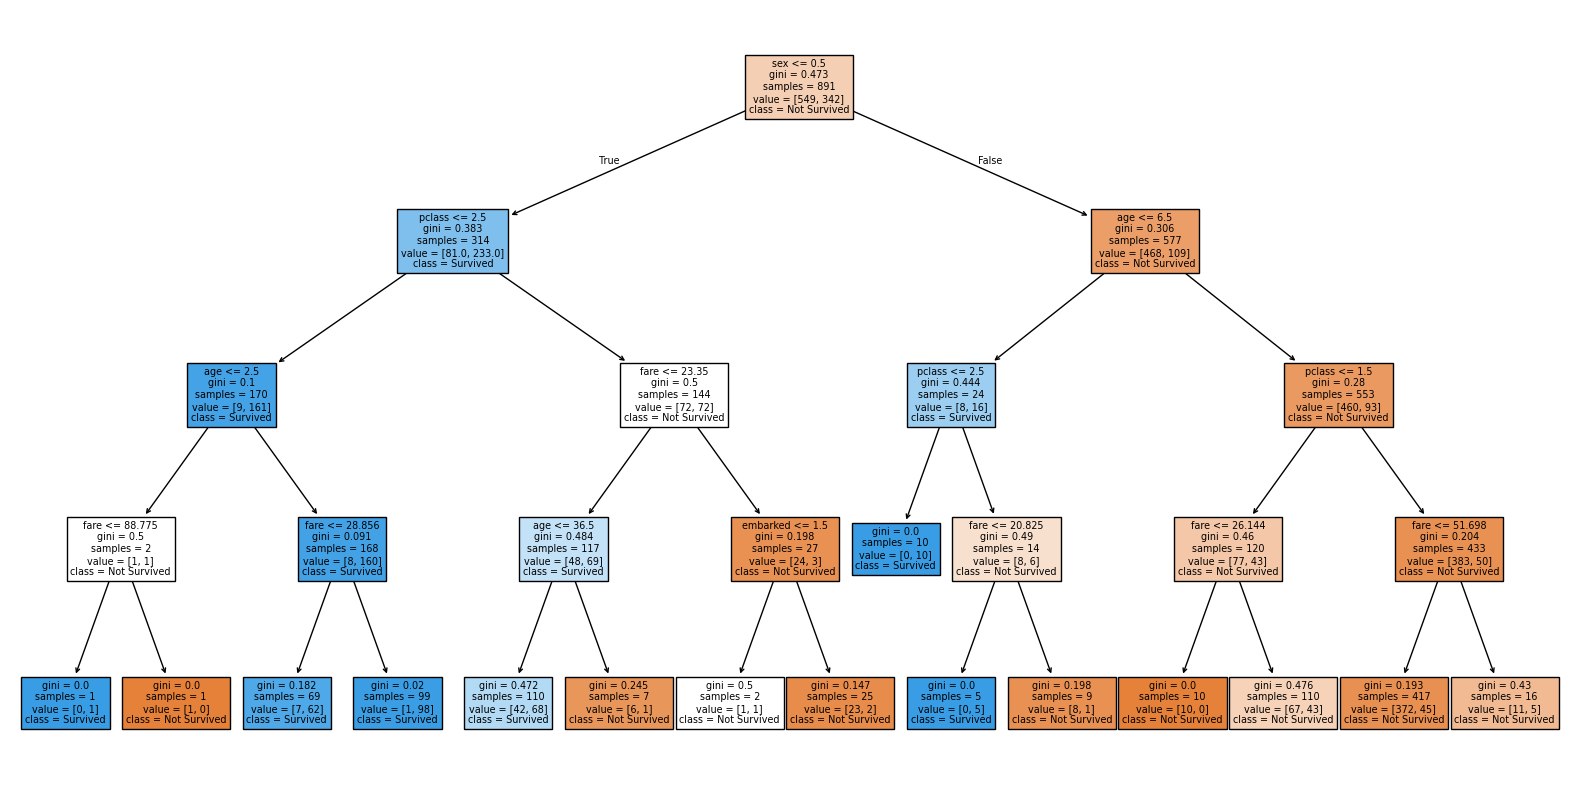

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["Not Survived","Survived"],
    filled=True
)
plt.show()

In [ ]:
new_passenger=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
prediction=model.predict(new_passenger)
prediction

array([0])

In [ ]:
if prediction[0]==1:
  print("Passenger is likely to survive")
else:
  print("Passenger is likely not to survive")

Passenger is likely not to survive


**On Bank Marketing Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/bank_marketing_dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df=df[['age','job','balance','loan','contact','deposit']]
df.head()

,age,job,balance,loan,contact,deposit
0,59,admin.,2343,no,unknown,yes
1,56,admin.,45,no,unknown,yes
2,41,technician,1270,no,unknown,yes
3,55,services,2476,no,unknown,yes
4,54,admin.,184,no,unknown,yes


In [ ]:
df[['balance']].describe()


,balance
count,11162.000000
mean,1528.538524
std,3225.413326
min,-6847.000000
25%,122.000000
50%,550.000000
75%,1708.000000
max,81204.000000


In [ ]:
lower = df['balance'].quantile(0.01)
upper = df['balance'].quantile(0.99)

df['balance'] = df['balance'].clip(lower, upper)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['job','loan','contact','deposit']:
    df[col] = encoder.fit_transform(df[col])

df.head()


,age,job,balance,loan,contact,deposit
0,59,0,2343.0,0,2,1
1,56,0,45.0,0,2,1
2,41,9,1270.0,0,2,1
3,55,7,2476.0,0,2,1
4,54,0,184.0,0,2,1


In [ ]:
x = df.drop('deposit', axis=1)
y = df['deposit']
x.head(), y.head()


(   age  job  balance  loan  contact
 0   59    0   2343.0     0        2
 1   56    0     45.0     0        2
 2   41    9   1270.0     0        2
 3   55    7   2476.0     0        2
 4   54    0    184.0     0        2,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: deposit, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=15,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=15, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6394984326018809


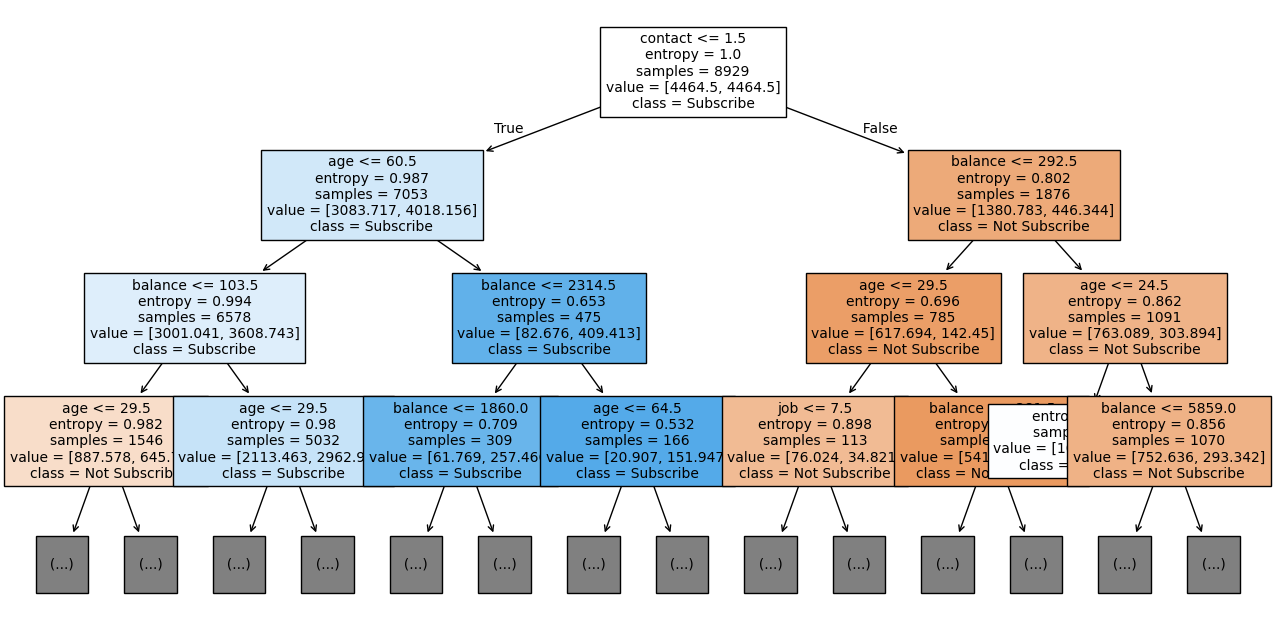

In [ ]:
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["Not Subscribe","Subscribe"],
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.show()


In [ ]:
new_customer = pd.DataFrame(
    [[35, 2, 1500, 0, 1]],
    columns=x.columns
)

prediction = model.predict(new_customer)

if prediction[0] == 1:
    print("Likely to subscribe")
else:
    print("Not likely to subscribe")


Not likely to subscribe


In [ ]:
# Interpret the learned rules
from sklearn.tree import export_text

rules = export_text(model, feature_names=list(x.columns))
print(rules)


|--- contact <= 1.50
|   |--- age <= 60.50
|   |   |--- balance <= 103.50
|   |   |   |--- age <= 29.50
|   |   |   |   |--- balance <= 83.00
|   |   |   |   |   |--- balance <= 65.50
|   |   |   |   |   |   |--- balance <= -191.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- balance >  -191.00
|   |   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- balance >  65.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- balance >  83.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  29.50
|   |   |   |   |--- balance <= -42.50
|   |   |   |   |   |--- balance <= -89.50
|   |   |   |   |   |   |--- job <= 4.50
|   |   |   |   |   |   |   |--- job <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- job >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |  

In [ ]:
# Which attribute is at the TOP of the decision logic?
top_feature = x.columns[model.tree_.feature[0]]
print("Top decision feature:", top_feature)


Top decision feature: contact


In [ ]:
# Why is this attribute important? (Feature importance)
# The way a customer is contacted (for example, cellular or telephone) strongly affects their response. Some contact methods are more personal and effective, which increases the likelihood of a customer subscribing to the term deposit.
import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

feature_importance

,0
contact,0.407579
age,0.253467
balance,0.233740
loan,0.061738
job,0.043476


In [ ]:
# What happens if the model becomes too deep?
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

deep_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    random_state=42
)

deep_model.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, deep_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, deep_model.predict(X_test)))

Train Accuracy: 0.9829768171127786
Test Accuracy: 0.6144200626959248


In [ ]:
# Effect of limiting depth on decision quality
shallow_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)

shallow_model.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, shallow_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, shallow_model.predict(X_test)))

Train Accuracy: 0.6252659872326128
Test Accuracy: 0.6238244514106583


In [ ]:
# Would you recommend this model? (Performance support)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[724 451]
 [354 704]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1175
           1       0.61      0.67      0.64      1058

    accuracy                           0.64      2233
   macro avg       0.64      0.64      0.64      2233
weighted avg       0.64      0.64      0.64      2233



In [ ]:
# Why better than black-box model? (Explainability proof)
print("Tree Depth:", model.get_depth())
print("Number of Leaves:", model.get_n_leaves())

Tree Depth: 8
Number of Leaves: 90


In [ ]:
df['deposit'].value_counts()
# count of 0 → customers who did not subscribe
# count of 1 → customers who subscribed


,count
deposit,
0,5873
1,5289
